<a href="https://colab.research.google.com/github/Namith143namith/atme_dsml1/blob/main/DAY7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for linear models (important for Ridge/Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define model
gbr = GradientBoostingRegressor(random_state=42)

# Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(gbr, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_

# Evaluate
from sklearn.metrics import r2_score

y_pred_gbr = best_gbr.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("Best GBR R² Score:", r2_gbr)

Best GBR R² Score: 0.8288266356513045


In [4]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
r2_ridge = r2_score(y_test, ridge.predict(X_test_scaled))

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
r2_lasso = r2_score(y_test, lasso.predict(X_test_scaled))

In [5]:
# Simple Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
r2_linreg = r2_score(y_test, linreg.predict(X_test_scaled))

In [6]:
# Simple Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
r2_linreg = r2_score(y_test, linreg.predict(X_test_scaled))

In [7]:
print(f"Linear Regression R²: {r2_linreg:.4f}")
print(f"Ridge Regression R² : {r2_ridge:.4f}")
print(f"Lasso Regression R² : {r2_lasso:.4f}")
print(f"Gradient Boosting R²: {r2_gbr:.4f}")

Linear Regression R²: 0.5758
Ridge Regression R² : 0.5758
Lasso Regression R² : 0.4814
Gradient Boosting R²: 0.8288


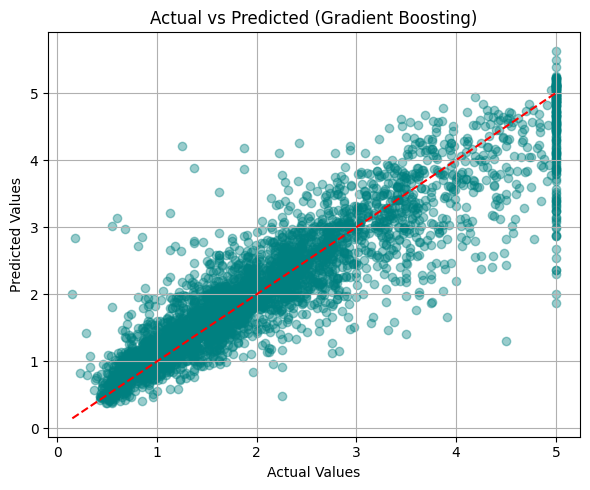

In [8]:
import matplotlib.pyplot as plt

y_pred = best_gbr.predict(X_test)

# Scatter Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Gradient Boosting)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

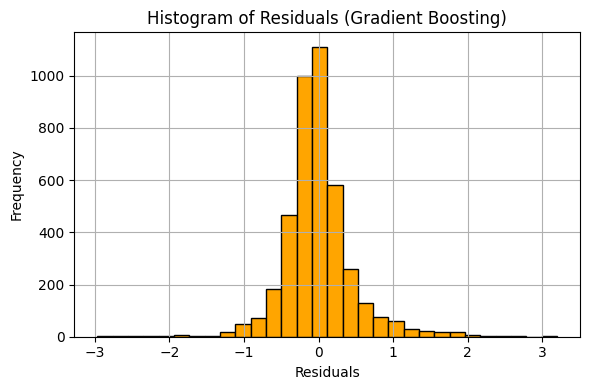

In [9]:
import numpy as np

# Residuals
residuals = y_test - y_pred

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Gradient Boosting)")
plt.grid(True)
plt.tight_layout()
plt.show()